In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
dataset = pd.read_csv('googleplaystore.csv')
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


C:\Users\firma\AppData\Local\Temp\ipykernel_1800\2595241166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Reviews'] = dataset['Reviews'].astype(int)


In [3]:
dataset['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [4]:
dataset = dataset[dataset['Installs'] != 'Free']
dataset.loc[dataset['Installs'] == 'Free', 'Installs'] = 0
dataset['Installs'] = dataset['Installs'].str.replace(',','').str.replace('+','').astype(int)

dataset.loc[:, 'Reviews'] = dataset['Reviews'].str.replace("'", "")
dataset['Reviews'] = dataset['Reviews'].astype(int)

dataset['Installs'].head()

C:\Users\firma\AppData\Local\Temp\ipykernel_2396\3205683366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Installs'] = dataset['Installs'].str.replace(',','').str.replace('+','').astype(int)
C:\Users\firma\AppData\Local\Temp\ipykernel_2396\3205683366.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Reviews'] = dataset['Reviews'].astype(int)


0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

In [5]:
#selected_rows = dataset.loc[[10472]]
#selected_rows

In [6]:
# dataset['Installs']

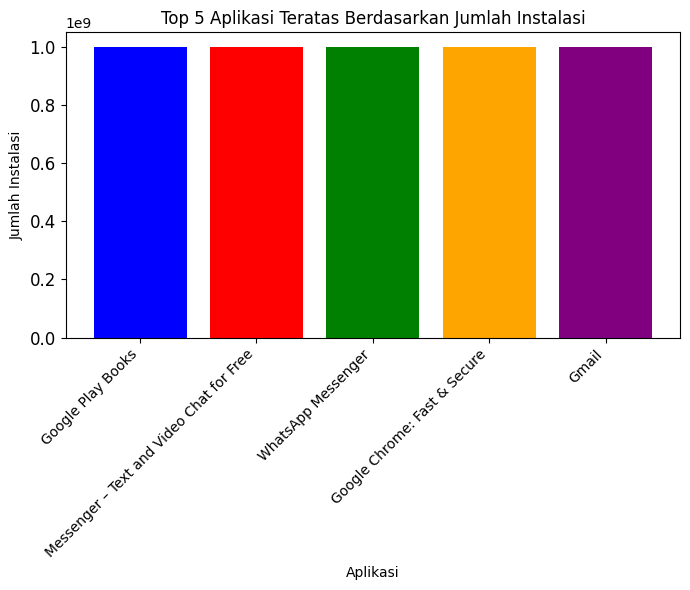

In [7]:
top_apps = dataset.nlargest(5, 'Installs')

plt.figure(figsize=(7, 6))
bars = plt.bar(top_apps['App'], top_apps['Installs'], color=['blue','red','green','orange','purple'])
plt.xlabel('Aplikasi')
plt.ylabel('Jumlah Instalasi')
plt.title('Top 5 Aplikasi Teratas Berdasarkan Jumlah Instalasi')
plt.xticks(rotation=45, ha='right')
plt.yticks(size = 12)
plt.tight_layout()
plt.show()


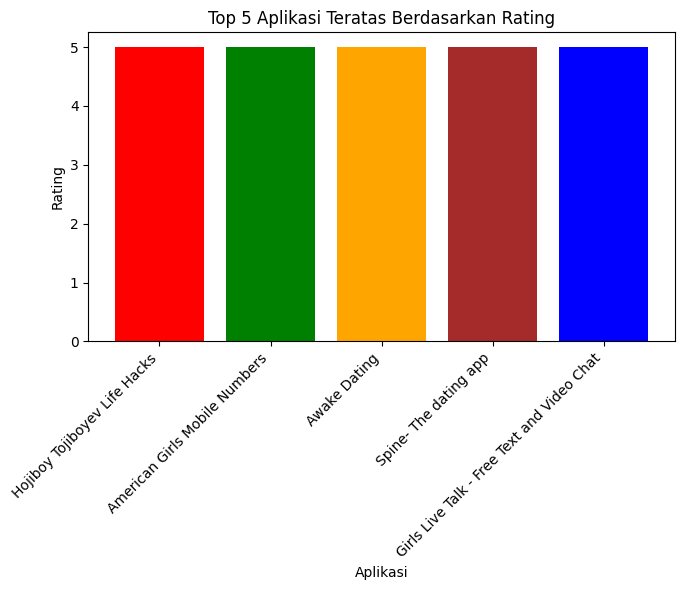

In [8]:
top_apps = dataset.nlargest(5, 'Rating')

plt.figure(figsize=(7, 6))
bars = plt.bar(top_apps['App'], top_apps['Rating'], color=['red', 'green', 'orange', 'brown', 'blue'])  
plt.xlabel('Aplikasi')
plt.ylabel('Rating')
plt.title('Top 5 Aplikasi Teratas Berdasarkan Rating')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [9]:
group = dataset.groupby('Genres')['Reviews'].sum().reset_index()
group

,Genres,Reviews
0,Action,350303953
1,Action;Action & Adventure,2343527
2,Adventure,29731704
3,Adventure;Action & Adventure,40140611
4,Adventure;Brain Games,7148
...,...,...
114,Video Players & Editors,110101364
115,Video Players & Editors;Creativity,319241
116,Video Players & Editors;Music & Video,278154
117,Weather,14604735


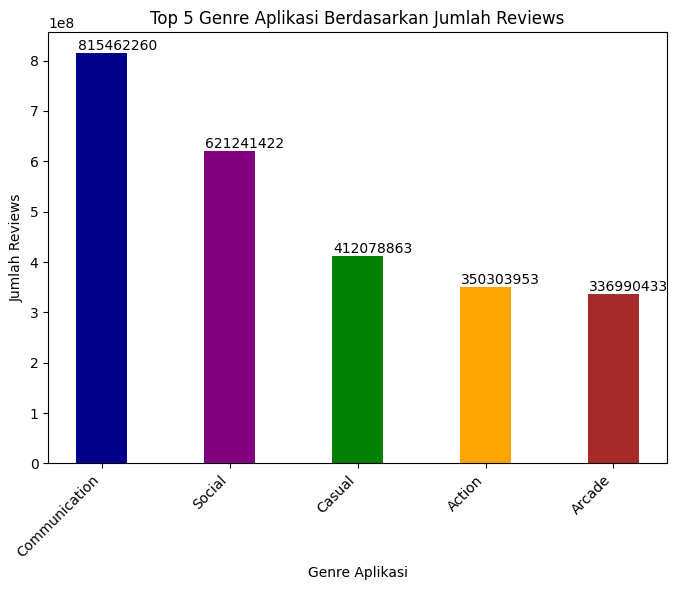

In [11]:
top_genres = group.nlargest(5, 'Reviews')

plt.figure(figsize=(7, 6))

# Mengatur ukuran bar dengan parameter width
bars = plt.bar(top_genres['Genres'], top_genres['Reviews'], color=['darkblue', 'purple', 'green', 'orange', 'brown'], width=0.4)

plt.xlabel('Genre Aplikasi')
plt.ylabel('Jumlah Reviews')
plt.title('Top 5 Genre Aplikasi Berdasarkan Jumlah Reviews')
plt.xticks(rotation=45, ha='right')

# Menambahkan label jumlah reviews di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/40.0, yval, int(yval), va='bottom')

plt.tight_layout()
plt.show()